In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
adv_house = dataset.copy()

In [6]:
dataset = dataset.drop('Id',axis=1)

### Pre-Processing

#### Step-1: Handling the missing data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
dataset.isnull().sum()/len(dataset)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

#### Removing the variables with more than 25% missing data

In [9]:
drop = ['Alley','MiscFeature','Fence','PoolQC','FireplaceQu']  # since the missing data is greater than 25%
dataset = dataset.drop(drop,axis=1)

In [10]:
dataset.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:>

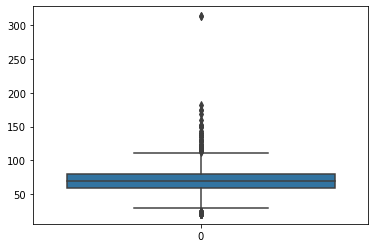

In [11]:
sns.boxplot(data=dataset['LotFrontage'])

In [12]:
dataset['LotFrontage'] = dataset.LotFrontage.fillna(dataset.LotFrontage.median())

In [13]:
dataset.MasVnrType.describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [14]:
dataset['MasVnrType'] = dataset.MasVnrType.fillna('None')

In [15]:
dataset.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
dataset.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:>

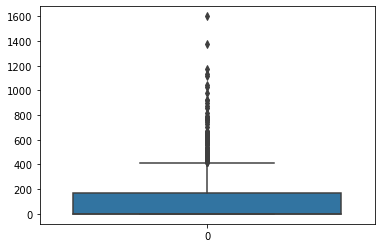

In [17]:
sns.boxplot(data= dataset['MasVnrArea'])

In [18]:
dataset['MasVnrArea'] = dataset.MasVnrArea.fillna(dataset.MasVnrArea.median())

In [19]:
dataset.BsmtQual.describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [20]:
dataset['BsmtQual'] = dataset.BsmtQual.fillna("TA")

In [21]:
dataset.BsmtQual.value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [22]:
dataset.BsmtCond.describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [23]:
dataset['BsmtCond'] = dataset.BsmtCond.fillna('TA')

In [24]:
dataset.BsmtCond.value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [25]:
dataset.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [26]:
dataset['BsmtExposure'] = dataset.BsmtExposure.fillna('No')

In [27]:
dataset.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [28]:
dataset.BsmtFinType1.describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [29]:
dataset['BsmtFinType1'] = dataset.BsmtFinType1.fillna("Unf")

In [30]:
dataset.BsmtFinType1.value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [31]:
dataset.BsmtFinType2.describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [32]:
dataset['BsmtFinType2'] = dataset.BsmtFinType2.fillna('Unf')

In [33]:
dataset.BsmtFinType2.value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [34]:
dataset.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [35]:
dataset['Electrical'] = dataset.Electrical.fillna('SBrkr')

In [36]:
dataset.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
dataset.GarageType.describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [38]:
dataset['GarageType'] = dataset.GarageType.fillna('Attchd')

In [39]:
dataset.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [40]:
dataset.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<AxesSubplot:>

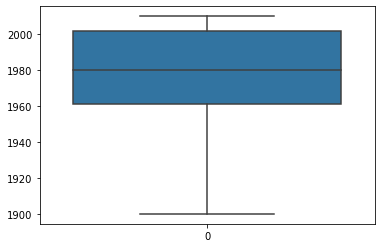

In [41]:
sns.boxplot(data=dataset['GarageYrBlt'])

In [42]:
dataset['GarageYrBlt'] =dataset.GarageYrBlt.fillna(dataset.GarageYrBlt.mean())

In [43]:
dataset.GarageFinish.describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

In [44]:
dataset['GarageFinish'] = dataset.GarageFinish.fillna('Unf')

In [45]:
dataset.GarageFinish.value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [46]:
dataset.GarageQual.describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [47]:
dataset['GarageQual'] = dataset.GarageQual.fillna('TA')

In [48]:
dataset.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [49]:
dataset.GarageCond.describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [50]:
dataset['GarageCond'] = dataset.GarageCond.fillna('TA')

In [51]:
dataset.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [52]:
dataset.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [53]:
dataset.to_csv('train_cleaned.csv')

### Removing the unwanted variables

In [54]:
obj = []
for x in dataset.columns:
  if dataset[x].dtype =='O':
    obj.append(x)
obj

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [55]:
num = []
for x in dataset.columns:
  if x not in obj:
    num.append(x)

num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [56]:
num.remove('SalePrice')

In [57]:
dataset_obj = dataset.drop(num,axis=1)

### Checking the object variables significance

#### Converting the Objects into the Hot Encoding

In [58]:
for x in obj:
  dataset_obj[x] = dataset_obj[x].astype('category')
  dataset_obj[x] = dataset_obj[x].cat.codes
dataset_obj.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,250000


<Axes:>

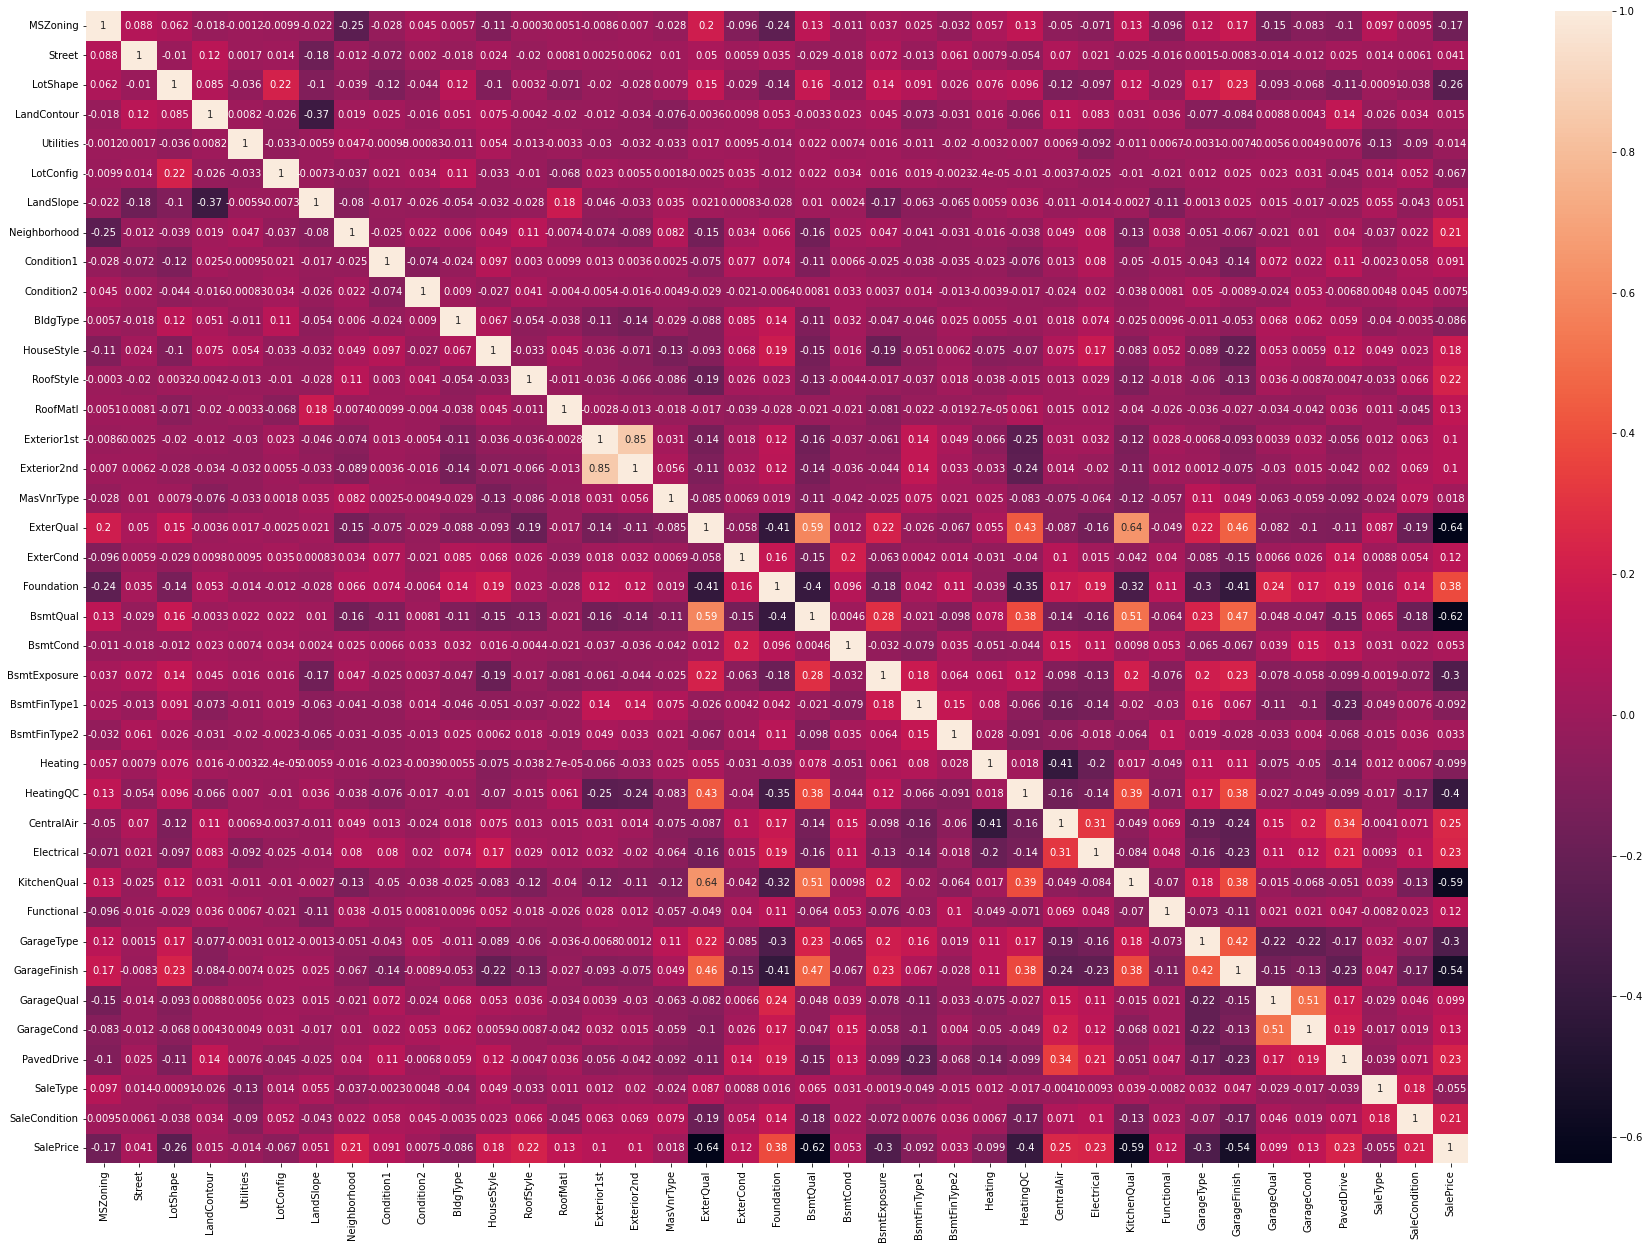

In [59]:
fig = plt.figure()
axis = fig.add_axes([0,0,4,4])


sns.heatmap(data= dataset_obj.corr(),annot=True)

#### Selecting only the variables whose correlation value is greater than 0.3

In [60]:
corel = []
check2 = dataset_obj.corr()['SalePrice']
for x in check2.index:
  if check2[x] > 0.3 or check2[x]<-0.3:
    corel.append(x)
corel

['ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SalePrice']

In [64]:
corel.remove('SalePrice')

In [61]:
check = dataset.corr()['SalePrice']
check.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes:>

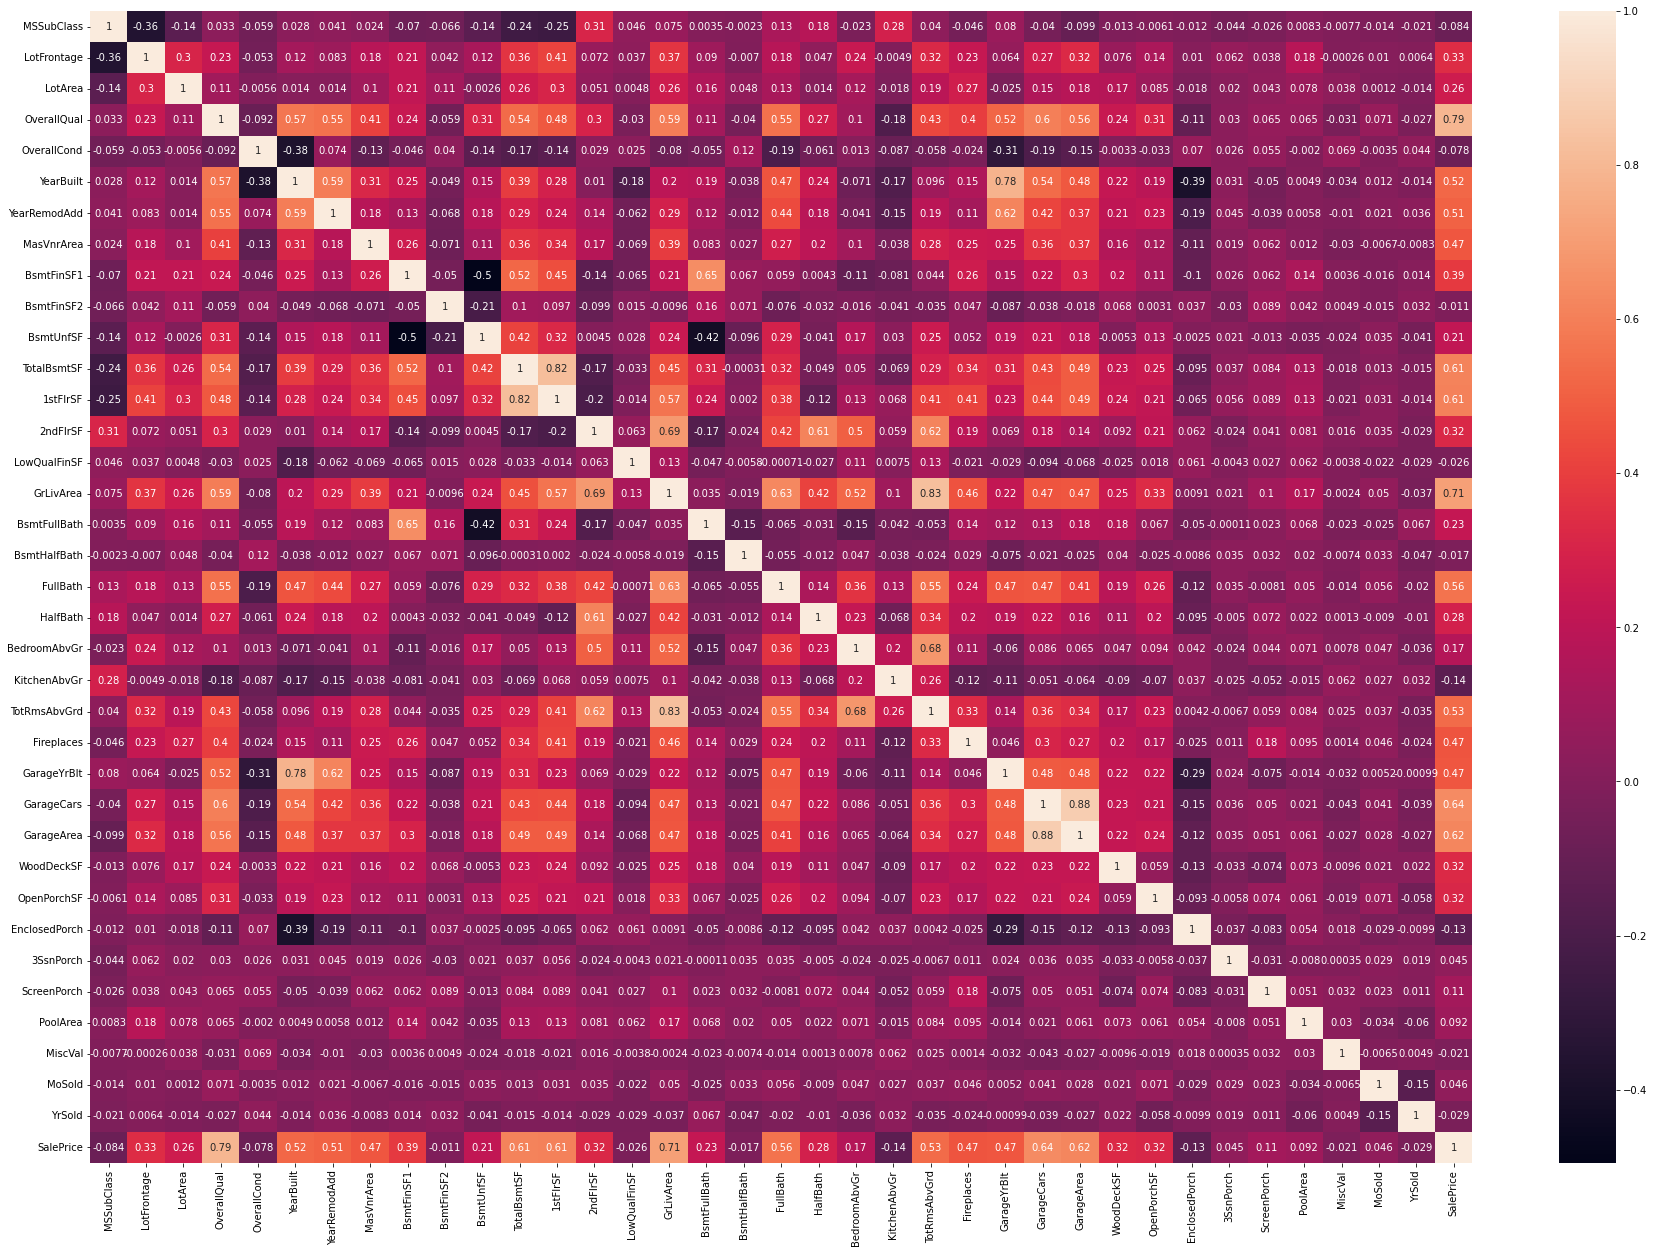

In [63]:
fig = plt.figure()
axis = fig.add_axes([0,0,4,4])

sns.heatmap(data = dataset.corr(),annot=True)

#### Selecting the variables whose correlation is greater than 0.3

In [62]:
corr = []
for x in check.index:
  if check[x] > 0.3:
    print(x)
    corr.append(x)
corr

LotFrontage
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
SalePrice


['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [66]:
features = corel + corr
features

['ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [67]:
drop = []
for x in dataset.columns:
  if x not in features:
    drop.append(x)
drop 

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [68]:
dataset = dataset.drop(drop,axis=1)
dataset.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,Gd,PConc,Gd,706,856,Ex,856,854,1710,2,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,TA,CBlock,Gd,978,1262,Ex,1262,0,1262,2,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,Gd,PConc,Gd,486,920,Ex,920,866,1786,2,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,TA,BrkTil,TA,216,756,Gd,961,756,1717,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,Gd,PConc,Gd,655,1145,Ex,1145,1053,2198,2,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,250000


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1460 non-null   float64
 5   ExterQual     1460 non-null   object 
 6   Foundation    1460 non-null   object 
 7   BsmtQual      1460 non-null   object 
 8   BsmtFinSF1    1460 non-null   int64  
 9   TotalBsmtSF   1460 non-null   int64  
 10  HeatingQC     1460 non-null   object 
 11  1stFlrSF      1460 non-null   int64  
 12  2ndFlrSF      1460 non-null   int64  
 13  GrLivArea     1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  KitchenQual   1460 non-null   object 
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageType    1460 non-null 

### Converting all the object values into numeric by Encoding

In [70]:
obj = []
for x in dataset.columns:
  if dataset[x].dtype =='O':
    obj.append(x)
obj

['ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [71]:
for x in obj:
  dataset[x] = dataset[x].astype('category')
  dataset[x] = dataset[x].cat.codes
dataset.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,2,2,2,706,856,0,856,854,1710,2,2,8,0,1,2003.0,1,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,3,1,2,978,1262,0,1262,0,1262,2,3,6,1,1,1976.0,1,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,2,2,2,486,920,0,920,866,1786,2,2,6,1,1,2001.0,1,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,3,0,3,216,756,2,961,756,1717,1,2,7,1,5,1998.0,2,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,2,2,2,655,1145,0,1145,1053,2198,2,2,9,1,1,2000.0,1,3,836,192,84,250000


In [98]:
x = dataset.drop('SalePrice',axis=1)
y = adv_house['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Standardising the data to remove the outliers

In [99]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

### Checking for the Multicolinearity

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled

vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.357560,LotFrontage
1,3.299111,OverallQual
2,4.521715,YearBuilt
3,2.115568,YearRemodAdd
4,1.381697,MasVnrArea
5,2.442677,ExterQual
6,1.907337,Foundation
7,2.017834,BsmtQual
8,1.568381,BsmtFinSF1
9,4.169041,TotalBsmtSF


#### Removing the multicolinearity by deleting the variables whose VIF value is greater than 5

In [101]:
x = x.drop(['GrLivArea','1stFlrSF','GarageCars'],axis=1)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)


from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled

vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.335892,LotFrontage
1,3.252513,OverallQual
2,4.080137,YearBuilt
3,2.106199,YearRemodAdd
4,1.366432,MasVnrArea
5,2.436196,ExterQual
6,1.854414,Foundation
7,1.999736,BsmtQual
8,1.539806,BsmtFinSF1
9,2.961105,TotalBsmtSF


### Spliting the data into train and test

In [105]:
from sklearn.model_selection import train_test_split
x_train ,y_train,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=123)

### Building the model using OLS method

In [106]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model = smf.OLS(endog = y_train, exog = x_train ).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1283.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:18:49   Log-Likelihood:                         -12174.
No. Observations:                1021   AIC:                                  2.439e+04
Df Residuals:                     999   BIC:                                  2.450e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotFrontage    -18.7295     63.851     -0.293      0.769    -144.027     106.568
OverallQual   1.467e+04   1473.798      9.956      0.000    1.18e+04    1.76e+04
YearBuilt       27.5653     72.628      0.380      0.704    -114.955     170.086
YearRemodAdd   192.0205     65.351      2.938      0.003      63.780     320.261
MasVnrArea      21.8655      7.588      2.882      0.004       6.976      36.755
ExterQual    -7973.5895   2570.424     -3.102      0.002    -1.3e+04   -2929.540
Foundation    4970.8566   2069.772      2.402      0.017     909.257    9032.456
BsmtQual     -9433.6182   1816.931     -5.192      0.000    -1.3e+04   -5868.180
BsmtFinSF1      17.1543      3.074      5.581      0.000      11.123      23.186
TotalBsmtSF     21.2744      4.556      4.670      0.000      12.334      30.215
HeatingQC     -655.2796    791.972     -0.827      0.408   -2209.399     898.840
2ndFlrSF        16.1755      4.255      3.801      0.000       7.825      24.526
FullBath      4973.3705   2979.150      1.669      0.095    -872.738    1.08e+04
KitchenQual  -1.022e+04   2043.258     -5.001      0.000   -1.42e+04   -6209.506
TotRmsAbvGrd  5954.2582   1134.679      5.248      0.000    3727.632    8180.885
Fireplaces    1.269e+04   2106.693      6.025      0.000    8558.786    1.68e+04
GarageType   -1484.3111    814.211     -1.823      0.069   -3082.072     113.449
GarageYrBlt   -200.6337     77.291     -2.596      0.010    -352.305     -48.963
GarageFinish -1126.1781   1958.991     -0.575      0.566   -4970.387    2718.031
GarageArea      48.6540      7.810      6.230      0.000      33.328      63.980
WoodDeckSF      34.1955      9.483      3.606      0.000      15.586      52.805
OpenPorchSF     -7.5377     19.560     -0.385      0.700     -45.921      30.846
==============================================================================
Omnibus:                      497.312   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73797.485
Skew:                          -1.161   Prob(JB):                         0.00
Kurtosis:                      44.585   Cond. No.                     9.65e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Removing the variables whose P-value is more than 0.05

In [107]:
x = x.drop(['LotFrontage','YearBuilt','HeatingQC','FullBath','GarageType','GarageFinish','OpenPorchSF'],axis=1)

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=123)

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model = smf.OLS(endog = y_train, exog = x_train ).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1874.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:19:14   Log-Likelihood:                         -12180.
No. Observations:                1021   AIC:                                  2.439e+04
Df Residuals:                    1006   BIC:                                  2.446e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.586e+04   1410.809     11.245      0.000    1.31e+04    1.86e+04
YearRemodAdd   178.4286     59.525      2.998      0.003      61.621     295.236
MasVnrArea      22.5402      7.496      3.007      0.003       7.831      37.249
ExterQual    -8096.8078   2529.056     -3.202      0.001   -1.31e+04   -3133.979
Foundation    7263.1311   1868.819      3.886      0.000    3595.902    1.09e+04
BsmtQual     -1.009e+04   1793.907     -5.623      0.000   -1.36e+04   -6566.998
BsmtFinSF1      16.9771      3.042      5.582      0.000      11.008      22.946
TotalBsmtSF     22.5237      4.339      5.191      0.000      14.009      31.039
2ndFlrSF        16.0129      4.123      3.884      0.000       7.922      24.103
KitchenQual  -1.032e+04   2021.871     -5.103      0.000   -1.43e+04   -6350.714
TotRmsAbvGrd  6357.9162   1063.886      5.976      0.000    4270.226    8445.607
Fireplaces    1.336e+04   2072.130      6.446      0.000    9291.173    1.74e+04
GarageYrBlt   -165.0242     59.763     -2.761      0.006    -282.300     -47.749
GarageArea      45.2030      7.251      6.234      0.000      30.974      59.432
WoodDeckSF      36.5241      9.382      3.893      0.000      18.113      54.936
==============================================================================
Omnibus:                      551.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84404.555
Skew:                          -1.412   Prob(JB):                         0.00
Kurtosis:                      47.453   Cond. No.                     7.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Building the Linear Regression Model


In [108]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [109]:
y_pred_train = lin_model.predict(x_train)
y_pred_test = lin_model.predict(x_test)

### Checking the accuracy of the model

In [110]:
from sklearn.metrics import r2_score

print('Training Result:',r2_score(y_train,y_pred_train))
print('#######'*8)
print('Test Result:',r2_score(y_test,y_pred_test))

Training Result: 0.7947336951298609
########################################################
Test Result: 0.8285630041271989


In [111]:
from xgboost import XGBRFRegressor
regressor = XGBRFRegressor()
regressor.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [112]:
y_pred_xgb_train = regressor.predict(x_train)
y_pred_xgb_test = regressor.predict(x_test)

In [113]:
print('Training Result:',r2_score(y_train,y_pred_xgb_train))
print('#######'*8)
print('Test Result:',r2_score(y_test,y_pred_xgb_test))

Training Result: 0.9257078736843855
########################################################
Test Result: 0.8200307067620662


### Test data prediction

In [114]:
test_dataset = pd.read_csv('test.csv')

In [115]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Droping all the variables dropped in train dataset.

In [116]:
drop =['Alley','MiscFeature','Fence','PoolQC','FireplaceQu','MSSubClass','MSZoning','LotArea','Street','LotShape',
       'LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
       'HouseStyle','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterCond',
       'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','CentralAir',
       'Electrical','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Functional',
       'GarageQual','GarageCond','PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold',
       'YrSold','SaleType','SaleCondition','GrLivArea','1stFlrSF','GarageCars']

In [117]:
test_dataset = test_dataset.drop(drop,axis=1)
test_dataset.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,2ndFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF
0,1461,80.0,5,1961,1961,0.0,TA,CBlock,TA,468.0,882.0,TA,0,1,TA,5,0,Attchd,1961.0,Unf,730.0,140,0
1,1462,81.0,6,1958,1958,108.0,TA,CBlock,TA,923.0,1329.0,TA,0,1,Gd,6,0,Attchd,1958.0,Unf,312.0,393,36
2,1463,74.0,5,1997,1998,0.0,TA,PConc,Gd,791.0,928.0,Gd,701,2,TA,6,1,Attchd,1997.0,Fin,482.0,212,34
3,1464,78.0,6,1998,1998,20.0,TA,PConc,TA,602.0,926.0,Ex,678,2,Gd,7,1,Attchd,1998.0,Fin,470.0,360,36
4,1465,43.0,8,1992,1992,0.0,Gd,PConc,Gd,263.0,1280.0,Ex,0,2,Gd,5,0,Attchd,1992.0,RFn,506.0,0,82


In [118]:
test_dataset.columns

Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [119]:
drop = ['LotFrontage','YearBuilt','HeatingQC','FullBath','GarageType','GarageFinish','OpenPorchSF']

In [120]:
test_dataset = test_dataset.drop(drop,axis=1)
test_dataset.head()

,Id,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF
0,1461,5,1961,0.0,TA,CBlock,TA,468.0,882.0,0,TA,5,0,1961.0,730.0,140
1,1462,6,1958,108.0,TA,CBlock,TA,923.0,1329.0,0,Gd,6,0,1958.0,312.0,393
2,1463,5,1998,0.0,TA,PConc,Gd,791.0,928.0,701,TA,6,1,1997.0,482.0,212
3,1464,6,1998,20.0,TA,PConc,TA,602.0,926.0,678,Gd,7,1,1998.0,470.0,360
4,1465,8,1992,0.0,Gd,PConc,Gd,263.0,1280.0,0,Gd,5,0,1992.0,506.0,0


In [121]:
test_dataset = test_dataset.drop('Id',axis=1)
test_dataset.head()

,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF
0,5,1961,0.0,TA,CBlock,TA,468.0,882.0,0,TA,5,0,1961.0,730.0,140
1,6,1958,108.0,TA,CBlock,TA,923.0,1329.0,0,Gd,6,0,1958.0,312.0,393
2,5,1998,0.0,TA,PConc,Gd,791.0,928.0,701,TA,6,1,1997.0,482.0,212
3,6,1998,20.0,TA,PConc,TA,602.0,926.0,678,Gd,7,1,1998.0,470.0,360
4,8,1992,0.0,Gd,PConc,Gd,263.0,1280.0,0,Gd,5,0,1992.0,506.0,0


In [122]:
x.columns

Index(['OverallQual', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF'],
      dtype='object')

### Handling the missing data

In [123]:
test_dataset.isnull().sum()/len(test_dataset)*100

OverallQual     0.000000
YearRemodAdd    0.000000
MasVnrArea      1.028101
ExterQual       0.000000
Foundation      0.000000
BsmtQual        3.015764
BsmtFinSF1      0.068540
TotalBsmtSF     0.068540
2ndFlrSF        0.000000
KitchenQual     0.068540
TotRmsAbvGrd    0.000000
Fireplaces      0.000000
GarageYrBlt     5.346127
GarageArea      0.068540
WoodDeckSF      0.000000
dtype: float64

In [124]:
test_dataset.MasVnrArea.describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:>

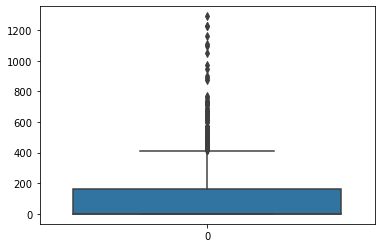

In [125]:
sns.boxplot(data=test_dataset['MasVnrArea'])

In [126]:
test_dataset['MasVnrArea'] = test_dataset.MasVnrArea.fillna(test_dataset.MasVnrArea.median())

In [127]:
test_dataset.BsmtQual.describe()

count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

In [128]:
test_dataset['BsmtQual'] = test_dataset.BsmtQual.fillna('TA')

In [129]:
test_dataset.BsmtQual.value_counts()

TA    678
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [130]:
test_dataset.BsmtFinSF1.describe()

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

<AxesSubplot:>

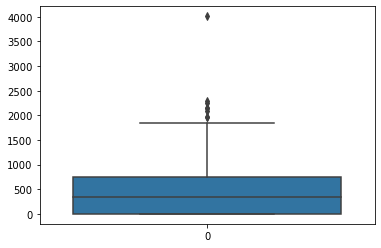

In [131]:
sns.boxplot(data=test_dataset['BsmtFinSF1'])

In [132]:
test_dataset['BsmtFinSF1'] = test_dataset.BsmtFinSF1.fillna(test_dataset.BsmtFinSF1.median())

In [133]:
test_dataset.TotalBsmtSF.describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

<AxesSubplot:>

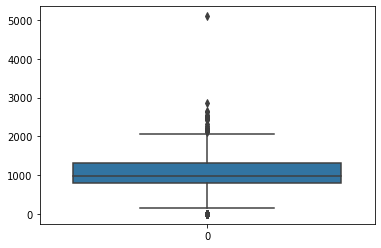

In [134]:
sns.boxplot(data=test_dataset['TotalBsmtSF'])

In [135]:
test_dataset['TotalBsmtSF'] = test_dataset.TotalBsmtSF.fillna(test_dataset.TotalBsmtSF.median())

In [136]:
test_dataset.TotalBsmtSF.describe()

count    1459.000000
mean     1046.078136
std       442.749327
min         0.000000
25%       784.000000
50%       988.000000
75%      1304.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [137]:
test_dataset.KitchenQual.describe()

count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

In [138]:
test_dataset['KitchenQual'] = test_dataset.KitchenQual.fillna('TA')

In [139]:
test_dataset.KitchenQual.value_counts()

TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [140]:
test_dataset.GarageYrBlt.describe()

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

<AxesSubplot:>

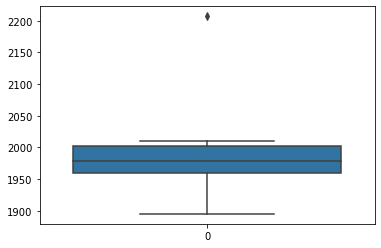

In [142]:
sns.boxplot(data=test_dataset['GarageYrBlt'])

In [143]:
test_dataset['GarageYrBlt'] = test_dataset.GarageYrBlt.fillna(test_dataset.GarageYrBlt.median())

In [144]:
test_dataset.GarageArea.describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

<AxesSubplot:>

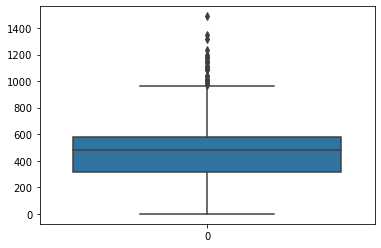

In [146]:
sns.boxplot(data=test_dataset['GarageArea'])

In [147]:
test_dataset['GarageArea'] = test_dataset.GarageArea.fillna(test_dataset.GarageArea.median())

In [148]:
test_dataset.isnull().sum()

OverallQual     0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtFinSF1      0
TotalBsmtSF     0
2ndFlrSF        0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageArea      0
WoodDeckSF      0
dtype: int64

### Hot level encoding of the objects

In [150]:
obj = []
for x in test_dataset.columns:
  if test_dataset[x].dtype =='O':
    obj.append(x)
obj

['ExterQual', 'Foundation', 'BsmtQual', 'KitchenQual']

In [151]:
for x in obj:
    test_dataset[x] = test_dataset[x].astype('category')
    test_dataset[x] = test_dataset[x].cat.codes
test_dataset.head()

,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF
0,5,1961,0.0,3,1,3,468.0,882.0,0,3,5,0,1961.0,730.0,140
1,6,1958,108.0,3,1,3,923.0,1329.0,0,2,6,0,1958.0,312.0,393
2,5,1998,0.0,3,2,2,791.0,928.0,701,3,6,1,1997.0,482.0,212
3,6,1998,20.0,3,2,3,602.0,926.0,678,2,7,1,1998.0,470.0,360
4,8,1992,0.0,2,2,2,263.0,1280.0,0,2,5,0,1992.0,506.0,0


In [153]:
y_pred_final = regressor.predict(test_dataset)
y_pred_final

array([132516.38, 157741.64, 145064.19, ..., 156414.44, 120403.63,
       211297.81], dtype=float32)

In [154]:
y1 = pd.read_csv('test.csv')

In [155]:
id1 = y1['Id']


In [157]:
sale = pd.DataFrame(y_pred_final,columns=['SalePrice'])
sale.head()

,SalePrice
0,132516.375000
1,157741.640625
2,145064.187500
3,168178.015625
4,213576.953125


In [158]:
sub = pd.concat([id1,sale],axis=1)
sub.head()

,Id,SalePrice
0,1461,132516.375000
1,1462,157741.640625
2,1463,145064.187500
3,1464,168178.015625
4,1465,213576.953125


In [159]:
sub.to_csv('Submission.csv')